<a href="https://colab.research.google.com/github/Dog-gum/Ai-study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1단원. 나의 첫 머신러닝

## 생선 분류 문제
주어진 생선이 도미인지 아닌지 구분하는 문제 -> k-최근접 이웃 알고리즘

## 데이터 준비하기

### 도미 데이터

In [1]:
# 도미의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 도미의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

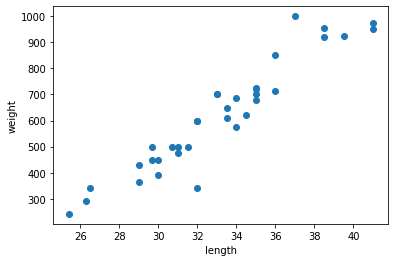

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight) # 산점도를 그리는 함수 .scatter()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 빙어 데이터

In [3]:
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

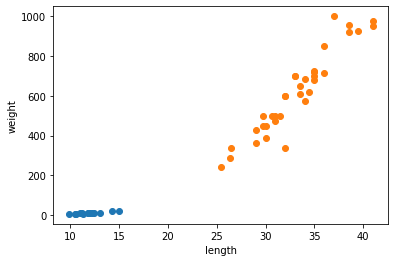

In [4]:
plt.scatter(smelt_length, smelt_weight) # 청색
plt.scatter(bream_length, bream_weight) # 주황색
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 데이터 합치기(scikit-learn 패키지는 2차원 데이터여야함)

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 2차원 데이터로 구성(zip()함수 활용-하나씩 꺼내서 반환)
fish_data = [[l,w] for l,w in zip(length, weight)]

### 정답 데이터

In [6]:
# 우리가 찾고자하는 생선은 도미이므로 도미 데이터에는 1(정답), 빙어 데이터에는 0(오답)을 넣으면 된다.

fish_target = [1]*35+[0]*14

## k-최근접 알고리즘 구현

k-최근접 이웃 알고리즘

->어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 판정하는 알고리즘. 

scikit-learn에서 k-최근접 이웃 알고리즘을 구현한 클래스 임포트

In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 훈련(fit()메소드 활용해서 훈련)
kn.fit(fish_data, fish_target) 

# 평가(score()메소드 활용해서 평가)
kn.score(fish_data, fish_target) 
# return된 결과가 1.0이라면 모든 답을 정확히 맞힘.(정확도)

1.0

학습된 model을 기준으로 예측하기

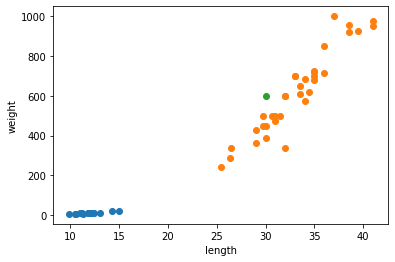

In [8]:
plt.scatter(smelt_length, smelt_weight) # 청색
plt.scatter(bream_length, bream_weight) # 주황색
plt.scatter(30,600) # 초록색
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

(30,600)이 도미 근처에 있으므로 도미라고 예측하게 될 것(k-최근접 알고리즘)

In [9]:
kn.predict([[30,600]])

array([1])

### k-근접 알고리즘의 활용

새로운 데이터가 주어졌을 떄 비교하는 근접 데이터의 수는 KNeighborsClassifier 클래스의 경우 5개가 기본값. n_neighbors를 매개변수로 바꿀 수 있음.

In [10]:
# 모든 데이터를 비교대상으로 설정할 경우
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

# 이 경우 전체 데이터에서 도미가 차지하는 비율을 결과로 반환할 것이다.

0.7142857142857143

#  2단원. 데이터 다루기

## 훈련 세트와 테스트 세트

1단원에서 입력(input), 타깃(target)을 합친 훈련 데이터(training data)와 입력에서 사용된 length와 weight 특성(feature)을 배웠다.
그런데, 이 경우 훈련에 사용한 데이터를 평가하는데 그대로 사용했기 때문에 test set와 train set가 겹치게 된다. 그래서 이번에는 train set과 test set을 나눠서 알고리즘을 만들어보겠다.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 데이터 슬라이싱
# fish_data는 lenght, weight 데이터를 넣은 것/ fish_target은 도미를 1, 빙어를 0으로 해서 정답과 오답 설정하기.
# 0~34번쨰 까지를 train용으로 활용
train_input = fish_data[:35]
train_target = fish_target[:35]
# 35~끝까지를 test용으로 활용
test_input = fish_data[35:]
test_target = fish_target[35:]

# model 훈련시키기
kn = kn.fit(train_input, train_target)
# model 확인하기
kn.score(test_input, test_target)

0.0

-> 정확도가 0이다!!!!! 최악의 성능을 내고있는 모델.

### 샘플링 편향

위의 model의 경우 fish_data에서 마지막 14개만을 테스트 세트로 떼어냈다. 빙어 없이 모델을 훈련했기 때문에 정확도가 0이 된 것이다. 즉, 세트를 구성할 때 도미와 빙어를 골고루 섞어서 구성해야한다.

### 넘파이를 활용해 샘플링 편향을 없애기

numpy로 data변형하기

In [12]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 리스트와 numpy의 차이점
print(fish_data)
print(input_arr)

# numpy의 array의 배열 크기
print(input_arr.shape)
# 49개의 샘플과 2개의 특성 

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700.

넘파이에서 무작위 결과를 만드는 함수 활용하기

In [13]:
np.random.seed(42) # 이 함수는 랜덤하게 뽑아지는 난수를 일정하게 설정하는 함수로 42가 오든 0,1 등 다른 수가 오는지는 중요하지 않다.

index = np.arange(49) # 0부터 48까지 1씩 증가하는 수를 만드는 함수
print(index)

np.random.shuffle(index) # index를 random하게 섞음
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [14]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

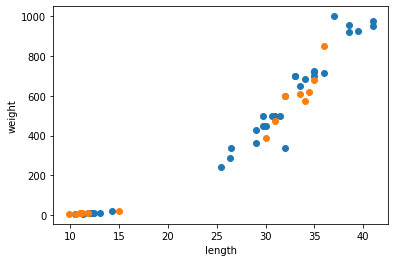

In [15]:
import matplotlib.pyplot as plt

# 2차원 배열은 행과 열의 인덱스를 ,를 기준으로 나누어 지정.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

머신러닝 model 학습, 검증

In [16]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

1.0

## 데이터 전처리

### 넘파이로 데이터 준비하기

In [17]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np
